In [63]:
import pandas as pd
df =pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


C:\Users\GIHAN LAKMAL\anaconda3\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

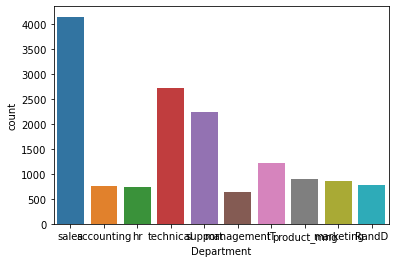

In [64]:
df.dtypes
import seaborn as sb
sb.countplot(df.Department)

In [65]:
#depend columns
dfX =df.drop("left" , axis =1 )

In [66]:
#indipended columns
dfY= df.left

In [67]:
dfX.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [68]:
dfY.isna().sum()

0

In [69]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le_count = 0
for col in dfX:
    le.fit(dfX[col])
    dfX[col] = le.transform(dfX[col])
    le_count += 1
print('{} columns were label encoded.'.format(le_count))

dfX.shape

9 columns were label encoded.


(14999, 9)

In [70]:
dfX.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,29,17,0,61,1,0,0,7,1
1,71,50,3,166,4,0,0,7,2
2,2,52,5,176,2,0,0,7,2
3,63,51,3,127,3,0,0,7,1
4,28,16,0,63,1,0,0,7,1


In [71]:
dfX.dtypes

satisfaction_level       int64
last_evaluation          int64
number_project           int64
average_montly_hours     int64
time_spend_company       int64
Work_accident            int64
promotion_last_5years    int64
Department               int32
salary                   int32
dtype: object

<AxesSubplot:>

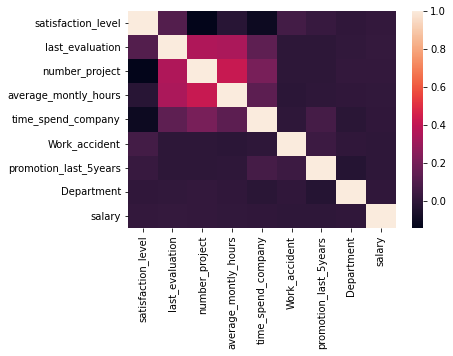

In [72]:
sb.heatmap(dfX.corr()  , annot =False ,  fmt=".0%")

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model = RandomForestClassifier(n_estimators = 100 , criterion='entropy' )

In [75]:
from  sklearn.model_selection import train_test_split

In [76]:
X_train , X_test , Y_train , Y_test = train_test_split(dfX , dfY , test_size =0.2 , random_state =1)

In [77]:
model.fit(X_train , Y_train)


RandomForestClassifier(criterion='entropy')

In [78]:
predicted = model.predict(X_test)

In [79]:
corrections = pd.DataFrame({ "predicted" : predicted , "true" :Y_test})
corrections

,predicted,true
11908,0,0
10508,0,0
9193,0,0
13087,0,0
506,1,1
...,...,...
8374,0,0
8499,0,0
2643,0,0
5411,0,0


In [80]:
model.score(X_test , Y_test)

0.9923333333333333

In [89]:
import xgboost
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [102]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [113]:
model1 = xgboost.XGBClassifier(min_child_weight = 1,max_depth = 15,learning_rate = 0.2,gamma= 0.2,colsample_bytree= 0.5)

In [114]:
random = RandomizedSearchCV(model1 , param_distributions=params ,n_iter=10 ,n_jobs=6 ,  verbose= 3 )

In [115]:
random.fit(X_train , Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.5,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0.2,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.2, max_bin=None,
                                           max_cat_...
                                           monotone_constraints=None,
                                           n

In [116]:
random.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [117]:
random.best_score_

0.9890825343893288

In [118]:
model1.fit(X_train , Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [119]:
model1.score(X_test , Y_test)

0.9916666666666667

In [121]:
from sklearn.model_selection import cross_val_score

In [127]:
score = cross_val_score(model1 , X_train , Y_train , cv =100)

In [126]:
score.mean()

0.9897494439810954